<h2><b>DATA ANALYSIS REPORT FOR LOK SABHA ELECTION 2024</b></h2>
<p>~ By Harsh Gupta</p>

In this report I have tried to scrape data from the given website (https://results.eci.gov.in) and also election commissions other website to get older data. I have tried to analyse what has happened this time in the election on the basis of 10 insight.

In [52]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import math
import tabula
from difflib import get_close_matches
import matplotlib.pyplot as plt

In [2]:
def getTable(url):
    response = requests.get(url)
    if(response.status_code == 200):
        htmlcon = response.text
        soup = BeautifulSoup(htmlcon, 'html.parser')
        table = soup.find('table')
        headers = [th.text.strip() for th in table.find('thead').find_all('th') if th.text.strip()]
        data = []
        for row in table.find_all('tr')[1:]: 
            row_data = [td.text.strip() for td in row.find_all('td')]
            data.append(row_data)

        df = pd.DataFrame(data, columns=headers) 
        return (soup.find('h2'),df)
    else:
        return False
    


Getting all the Parties and Seats they have won

In [3]:
all_parties = getTable("https://results.eci.gov.in/PcResultGenJune2024/index.htm")[1]
all_parties['Party Code'] = ""
for i in range(len(all_parties)-1):
    temp =all_parties.loc[i,'Party'].split("-")
    all_parties.loc[i,'Party'] = "-".join(temp[0:-1]).strip()
    all_parties.loc[i,'Party Code'] = temp[-1].strip()

all_parties.to_csv("Data/All_Parties.csv")


To Find the codes for each party

In [4]:
# for i in range(10000):
#     tab = getTable("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-"+str(i)+".htm")
#     if(tab!=False):
#         print(i)


Getting all the winning candidates list

In [60]:
party_codes = [
    1, 83, 118, 140, 160, 369, 544, 545, 547, 582, 664, 742, 743, 772, 804, 805, 
    834, 852, 860, 911, 1046, 1142, 1420, 1458, 1534, 1584, 1658, 1680, 1745, 
    1847, 1888, 1998, 2070, 2484, 2757, 2989, 3165, 3369, 3388, 3482, 3529, 3620
]
winning_candidates = pd.DataFrame()
for i in party_codes:
    tab = getTable("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-"+str(i)+".htm")
    data = tab[1]
    text = tab[0].text
    data.rename(columns={'S.No': 'Party'}, inplace=True)

    data['Party'] = text[19:].strip()[1:-1].strip()
    winning_candidates=pd.concat([winning_candidates, data], ignore_index=True)

for i in range(len(winning_candidates)):
    while winning_candidates.loc[i,'Parliament Constituency'][-1] != '(':
        winning_candidates.loc[i,'Parliament Constituency'] = winning_candidates.loc[i,'Parliament Constituency'][:-1]
    winning_candidates.loc[i,'Parliament Constituency'] = winning_candidates.loc[i,'Parliament Constituency'][:-1]

winning_candidates.to_csv("Data/Winning_candidates.csv")

In [6]:
def convert_to_numeric(value):
    try:
        return int(value)
    except ValueError:
        return 0
winning_candidates['Margin'] = winning_candidates['Margin'].apply(convert_to_numeric)
winning_candidates['Total Votes'] = winning_candidates['Total Votes'].apply(convert_to_numeric)
winning_candidates['Margin Percent'] = winning_candidates['Margin']/(winning_candidates['Total Votes']-winning_candidates['Margin'])

df_filtered = winning_candidates[winning_candidates['Margin Percent'] != 0]

1) TOP 10 MPs WHO WON WITH VERY LESS MARGIN

In [7]:
df_filtered.sort_values(by='Margin Percent', ascending=True).head(10)

,Party,Parliament Constituency,Winning Candidate,Total Votes,Margin,Margin Percent
532,Shiv Sena,Mumbai North West,RAVINDRA DATTARAM WAIKAR,452644,48,0.000106
340,Indian National Congress,Attingal,ADV ADOOR PRAKASH,328051,684,0.002089
173,Bharatiya Janata Party,JAIPUR RURAL,RAO RAJENDRA SINGH,617877,1615,0.002621
159,Bharatiya Janata Party,Jajpur,RABINDRA NARAYAN BEHERA,534239,1587,0.002979
242,Bharatiya Janata Party,KANKER,BHOJRAJ NAG,597624,1884,0.003162
466,Samajwadi Party,Hamirpur,AJENDRA SINGH LODHI,490683,2629,0.005387
205,Bharatiya Janata Party,Farrukhabad,MUKESH RAJPUT,487963,2678,0.005518
343,Indian National Congress,Dhule,BACHHAV SHOBHA DINESH,583866,3831,0.006605
218,Bharatiya Janata Party,Bansgaon,KAMLESH PASWAN,428693,3150,0.007402
232,Bharatiya Janata Party,Bishnupur,KHAN SAUMITRA,680130,5567,0.008253


2) TOP 10 MPs WHO WON WITH HUGE MARGIN

In [8]:
df_filtered.sort_values(by='Margin Percent', ascending=False).head(10)

,Party,Parliament Constituency,Winning Candidate,Total Votes,Margin,Margin Percent
139,Bharatiya Janata Party,INDORE,SHANKAR LALWANI,1226751,1175092,22.747092
85,Bharatiya Janata Party,Navsari,C R PATIL,1031065,773551,3.003918
66,Bharatiya Janata Party,Gandhinagar,AMIT SHAH,1010972,744716,2.796992
131,Bharatiya Janata Party,VIDISHA,SHIVRAJ SINGH CHOUHAN,1116460,821408,2.783943
303,Dravida Munnetra Kazhagam,THOOTHUKKUDI,KANIMOZHI KARUNANIDHI,540729,392738,2.653797
375,Indian National Congress,TIRUVALLUR,Sasikanth Senthil,796956,572155,2.545162
397,Indian National Congress,Nalgonda,KUNDURU RAGHUVEER,784337,559905,2.494765
121,Bharatiya Janata Party,KHAJURAHO,VISHNU DATT SHARMA (V.D.SHARMA),772774,541229,2.337468
186,Bharatiya Janata Party,Tripura West,BIPLAB KUMAR DEB,881341,611578,2.267094
306,Indian National Congress,Dhubri,RAKIBUL HUSSAIN,1471885,1012476,2.203866


Getting 2019 Voter Turn Out Data from - https://old.eci.gov.in/

In [9]:
voterdata2019 = pd.read_excel('Data/2019 Voter Data.xls')
states = []
voterdata2019.columns = voterdata2019.iloc[0]
voterdata2019 = voterdata2019.drop(voterdata2019.index[0])
state = ""
for i in range(len(voterdata2019)):
    if(math.isnan(voterdata2019.iloc[i,2])):
        state = voterdata2019.iloc[i,0]
        states.append(state)
    else:
        voterdata2019.loc[i,'State'] = state

voterdata2019.dropna(subset=['PC Name'], inplace=True, ignore_index=True)
voterdata2019 = voterdata2019.drop_duplicates()
voterdata2019.to_csv("Data/voterdata2019.csv")

In [10]:
states = states[:-3]

In [11]:
def closest_match(st,arr):
    try:
        closest_matches =  get_close_matches(st , arr,n=3, cutoff=0.8)
        if closest_matches:
            return closest_matches[0]
        else:
            return False
    except:
        return False
    

Getting 2024 Voter Turn Out Data from - https://elections24.eci.gov.in/

In [14]:
voterdata2024 = pd.DataFrame(columns=['State','PC Name','Electors','Voters Turn Out (%)','Votes'])
def is_nan(value):
    try:
        float(value)
        if(math.isnan(float(value))):
            return True
        else:
            return False
    except ValueError:
        return False
def get_pdf_data(pdf_file):
    global voterdata2024
# Extract all tables from the PDF (adjust page_number for specific pages)
    tables = tabula.read_pdf(pdf_file, pages="all")

    # Access individual tables (assuming a single table)
    dfs = []
    for table in tables:
        df = table.copy()
        dfs.append(df)
    for df in dfs:
        for i in range(len(df)):
            for j in range(len(df.iloc[i])):
                newr = []
                if(closest_match(df.iloc[i,j],states)==False):
                    continue
                else:
                    newr.append(closest_match(df.iloc[i,j],states))
                    j+=1
                    while(j<len(df.iloc[i])):
                        if(not is_nan(df.iloc[i,j])):
                            newr.append(str(df.iloc[i,j]))
                        j = j+1
                if(len(newr)==5):
                    voterdata2024.loc[len(voterdata2024)] = newr

In [15]:
get_pdf_data("Data/2024 Voter Turn Out Phase 1 to 5.pdf")
get_pdf_data("Data/2024 Voter Turn Out Phase 6.pdf")
get_pdf_data("Data/2024 Voter Turn Out Phase 7.pdf")
voterdata2024 = voterdata2024.drop_duplicates()



In [16]:
for i in range(len(voterdata2024)):
    try:
        float(voterdata2024.loc[i,'PC Name'])
        voterdata2024 = voterdata2024.drop(i)
    except ValueError:
        pass
voterdata2024 = voterdata2024.reset_index()
voterdata2024.to_csv("Data/voterdata2024.csv")

3) TOP 10 CONSTITUENCIES WITH LEAST VOTER TURN OUT

In [17]:
voterdata2024.sort_values(by='Voters Turn Out (%)', ascending=True).head(10)

,index,State,PC Name,Electors,Voters Turn Out (%),Votes
280,280,Jammu & Kashmir,SRINAGAR,1747810,38.49,672653
11,11,Bihar,Nawada,2006124,43.17,866102
413,414,Bihar,Patna Sahib,2292045,46.85,1073847
309,309,Telangana,Hyderabad,2217094.0,48.48,1074827.0
91,91,Uttarakhand,Almora,1339327.0,48.74,652726.0
394,394,Uttar Pradesh,Phulpur,2067043,48.91,1010909
320,320,Telangana,Secunderabad,2120401.0,49.04,1039834.0
157,157,Uttar Pradesh,Mathura,1929550.0,49.41,953388.0
127,127,Madhya Pradesh,REWA,1852126,49.43,915444
40,40,Rajasthan,KARAULI-DHOLPUR,1975352,49.59,979618


4) TOP 10 CONSTITUENCIES WITH MOST VOTER TURN OUT

In [18]:
voterdata2024.sort_values(by='Voters Turn Out (%)', ascending=False).head(10)

,index,State,PC Name,Electors,Voters Turn Out (%),Votes
163,163,Assam,Dhubri,2660827,92.08,2450041
267,267,Andhra Pradesh,Ongole,1607832,87.06,1399707
400,400,West Bengal,Bishnupur,1754268,85.91,1507040
265,265,Andhra Pradesh,Narsaraopet,1734858,85.65,1485909
256,256,Andhra Pradesh,Bapatla (SC),1506354,85.48,1287704
162,162,Assam,Barpeta,1966847,85.24,1676633
138,138,Manipur,Outer Manipur,484949,85.11,412737
406,406,West Bengal,Tamluk,1850741,84.79,1569233
403,403,West Bengal,Kanthi,1794537,84.77,1521159
258,258,Andhra Pradesh,Hindupur,1656775,84.7,1403259


In [19]:
def to_float(num):
    try:
        return float(num)
    except ValueError:
        return float(int(num))

In [ ]:
mpvoteshare = pd.DataFrame(columns=['PC Name','Candidate Name','Party','Votes','Total Votes',"Votes/Total Votes %"])
for i in range(len(winning_candidates)):
    temp = closest_match(winning_candidates.loc[i,'Parliament Constituency'],list(voterdata2024['PC Name']))
    rarr = []
    if(temp!=False):
        rarr.append(temp)
        rarr.append(winning_candidates.loc[i,'Winning Candidate'])
        rarr.append(winning_candidates.loc[i,'Party'])
        rarr.append(winning_candidates.loc[i,'Total Votes'])
        try:
            rarr.append(to_float(voterdata2024.loc[voterdata2024['PC Name'] == temp,'Votes']))
            rarr.append((to_float(rarr[-2])/to_float(rarr[-1]))*100) 
            mpvoteshare.loc[len(mpvoteshare)] = rarr
        except TypeError:
            pass


5) TOP CANDIDATES WHO WON MAXIMUM VOTE SHARE IN A CONSTITUENCY

In [21]:
mpvoteshare.sort_values(by='Votes/Total Votes %', ascending=False).head(10)

,PC Name,Candidate Name,Party,Votes,Total Votes,Votes/Total Votes %
9,Mathura,BAPI HALDAR,All India Trinamool Congress,755731,953388.0,79.267937
112,INDORE,SHANKAR LALWANI,Bharatiya Janata Party,1226751,1558341.0,78.721602
67,Navsari,C R PATIL,Bharatiya Janata Party,1031065,1326542.0,77.725771
49,Gandhinagar,AMIT SHAH,Bharatiya Janata Party,1010972,1305197.0,77.457426
104,VIDISHA,SHIVRAJ SINGH CHOUHAN,Bharatiya Janata Party,1116460,1449010.0,77.049848
143,Tripura West,BIPLAB KUMAR DEB,Bharatiya Janata Party,881341,1192435.0,73.911031
63,Vadodara,DR. HEMANG JOSHI,Bharatiya Janata Party,873189,1200768.0,72.719210
61,Panchmahal,RAJPALSINH MAHENDRASINH JADAV,Bharatiya Janata Party,794579,1116171.0,71.187927
58,Bhavnagar,NIMUBEN JAYANTIBHAI BAMBHANIYA (NIMUBEN BAMBHA...,Bharatiya Janata Party,716883,1033629.0,69.355929
144,Tripura East,KRITI DEVI DEBBARMAN,Bharatiya Janata Party,777447,1122424.0,69.265001


6. TOP CANDIDATES WHO WON MINIMUM VOTE SHARE IN A CONSTITUENCY

In [22]:
mpvoteshare.sort_values(by='Votes/Total Votes %', ascending=True).head(10)

,PC Name,Candidate Name,Party,Votes,Total Votes,Votes/Total Votes %
169,Bangaon,KAMLESH PASWAN,Bharatiya Janata Party,428693,1488209.0,28.805967
419,Buldhana,JADHAV PRATAPRAO GANPATRAO,Shiv Sena,349867,1105761.0,31.640382
360,Kaziranga,IQRA CHOUDHARY,Samajwadi Party,528013,1626408.0,32.464978
276,Attingal,ADV ADOOR PRAKASH,Indian National Congress,328051,970517.0,33.801675
166,Godda,KIRTIVARDHAN SINGH,Bharatiya Janata Party,474258,1391960.0,34.071238
202,Medak,MADHAVANENI RAGHUNANDAN RAO,Bharatiya Janata Party,471217,1372894.0,34.322897
231,DHARMAPURI,MANI. A.,Dravida Munnetra Kazhagam,432667,1238184.0,34.943676
341,Bankura,GIRIDHARI YADAV,Janata Dal (United),506678,1437826.0,35.239174
24,Giridih,CHANDRA PRAKASH CHOUDHARY,AJSU Party,451139,1253553.0,35.988825
306,VIRUDHUNAGAR,MANICKAM TAGORE B,Indian National Congress,385256,1054634.0,36.529829


In [24]:

for i in range(len(voterdata2024)):
    voterdata2024.loc[i,'Electors'] = to_float(voterdata2024.loc[i,'Electors'])
    voterdata2024.loc[i,'Votes'] = to_float(voterdata2024.loc[i,'Votes'])
voterdata2024bystate = voterdata2024.pivot_table(values=['Electors','Votes'], index='State', aggfunc=sum)
voterdata2024bystate['Voter Turnout %'] = (voterdata2024bystate['Votes']/voterdata2024bystate['Electors'])*100


/tmp/ipykernel_4154/1737944605.py:4: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  voterdata2024bystate = voterdata2024.pivot_table(values=['Electors','Votes'], index='State', aggfunc=sum)


7. TOP 5 STATES/UT WITH HIGHEST VOTER TURNOUT

In [25]:
voterdata2024bystate.sort_values(by='Voter Turnout %', ascending=False).head(5)

,Electors,Votes,Voter Turnout %
State,,,
Lakshadweep,57784.0,48630.0,84.158244
Assam,16796960.0,13730835.0,81.745953
Tripura,2860287.0,2314859.0,80.931004
Andhra Pradesh,38056070.0,30563527.0,80.311832
West Bengal,59669661.0,47719042.0,79.972035


8. TOP 5 STATES/UT WITH LEAST VOTER TURNOUT

In [26]:
voterdata2024bystate.sort_values(by='Voter Turnout %', ascending=True).head(5)


,Electors,Votes,Voter Turnout %
State,,,
Jammu & Kashmir,5207581.0,2798310.0,53.735314
Bihar,58182447.0,32330408.0,55.567288
Uttar Pradesh,98247393.0,55849111.0,56.845387
Mizoram,856364.0,487013.0,56.869859
Uttarakhand,8337914.0,4771288.0,57.224001


In [27]:

for i in range(len(voterdata2019)):
    voterdata2019.loc[i,'Electors'] = to_float(voterdata2019.loc[i,'Electors'])
    voterdata2019.loc[i,'Voters'] = to_float(voterdata2019.loc[i,'Voters'])
voterdata2019bystate = voterdata2019.pivot_table(values=['Electors','Voters'], index='State', aggfunc=sum)
voterdata2019bystate['Voter Turnout %'] = (voterdata2019bystate['Voters']/voterdata2019bystate['Electors'])*100
votershareincrease = pd.merge(voterdata2019bystate,voterdata2024bystate, on='State', suffixes=[' 2019',' 2024'])
votershareincrease['Increase %'] = ((votershareincrease['Voter Turnout % 2024']-votershareincrease['Voter Turnout % 2019'])/votershareincrease['Voter Turnout % 2019'])*100


/tmp/ipykernel_4154/2020682704.py:4: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  voterdata2019bystate = voterdata2019.pivot_table(values=['Electors','Voters'], index='State', aggfunc=sum)


9. TOP 5 STATES WHERE VOTE SHARE INCREASED FROM 2019 LOK SABHA ELECTION

In [28]:
votershareincrease.sort_values(by='Increase %', ascending=False).head(5)[['Voter Turnout % 2019','Voter Turnout % 2024','Increase %']]

,Voter Turnout % 2019,Voter Turnout % 2024,Increase %
State,,,
Jammu & Kashmir,44.969731,53.735314,19.492185
Meghalaya,71.431056,76.599312,7.235307
Karnataka,68.812548,73.128442,6.271958
Telangana,62.765821,65.672557,4.631081
Odisha,73.288644,76.011282,3.714953


10. TOP 5 STATES WHERE VOTE SHARE DECREASED FROM 2019 LOK SABHA ELECTION

In [29]:
votershareincrease.sort_values(by='Increase %', ascending=True).head(5)[['Voter Turnout % 2019','Voter Turnout % 2024','Increase %']]

,Voter Turnout % 2019,Voter Turnout % 2024,Increase %
State,,,
Nagaland,83.000172,57.721914,-30.455669
Mizoram,63.138136,56.869859,-9.927878
Kerala,77.837419,71.272354,-8.434331
Haryana,70.338495,64.744279,-7.953277
Rajasthan,66.338355,61.167096,-7.795278


(BONUS) STATE WISE VOTER TURN OUT %

In [59]:
import geopandas as gpd
fp = "Igismap/Indian_States.shp"
map_df = gpd.read_file(fp)

In [57]:
heatmapdata = pd.DataFrame(columns=['States','Voter Turn Out'],data={'States':voterdata2019bystate.index.tolist(),'Voter Turn Out':list(voterdata2019bystate['Voter Turnout %'])})

heatmapdata.loc[0,'States'] = 'Andaman & Nicobar Island'
heatmapdata.loc[2,'States'] = 'Arunanchal Pradesh'
heatmapdata.loc[7,'States'] = 'Dadara & Nagar Havelli'
heatmapdata.loc[23,'States'] = 'NCT of Delhi'
merged = map_df.set_index('st_nm').join(heatmapdata.set_index('States'))


<Axes: title={'center': 'State Wise Voter Turn Out %'}>

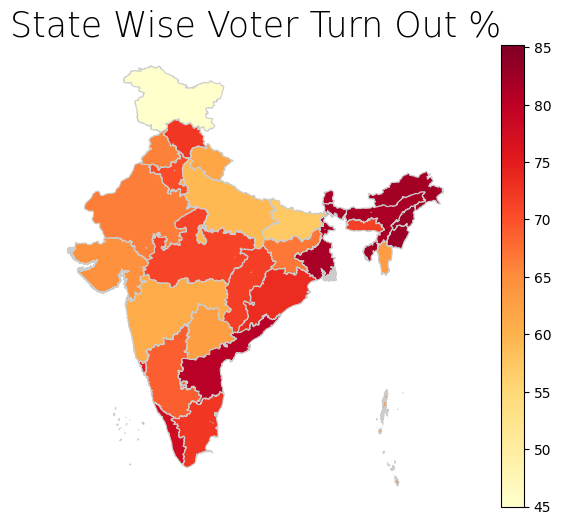

In [58]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('State Wise Voter Turn Out %', fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot the figure
merged.plot(column='Voter Turn Out', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)